Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All) to avoid typical problems with Jupyter notebooks. **Unfortunately, this does not work with Chrome right now, you will also need to reload the tab in Chrome afterwards**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Please put your name here:

In [24]:
NAME = "Aymane Hachcham"

---

# Forward-Backward- and Viterbi

This week we will implement the forward-backward, and Viterbi algorithms.

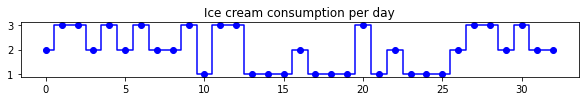

In [25]:
import numpy as np, matplotlib.pyplot as plt
icecream = [int(x) for x in open("/data/icecream.csv")]
plt.figure(figsize=(10,1))
plt.title("Ice cream consumption per day")
plt.step(np.arange(0, len(icecream)), icecream, where="mid", label="Ice cream", color="b")
plt.step(np.arange(0, len(icecream)), icecream, "o", where="mid", color="b");

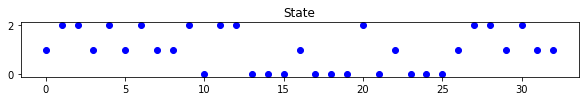

In [26]:
# Convert ice cream into a 0-indexed state array:
states = np.array(icecream) - 1
plt.figure(figsize=(10,1))
plt.title("State")
plt.step(np.arange(0, len(states)), states, "o", where="mid", color="b");

In [27]:
len(states)

33

## Implement the forward algorithm

With a starting probability distribution `pi` and a transition matrix `a` and an observation probability matrix `b`.

Use vectorized operations where possible.

You do not need to conserve memory. Instead, return the entire $N\times k$ matrix for $N$ steps and $k$ states.

In [28]:
def forward(data, pi, a, b):
    """Forward algorithm"""
    k = len(pi)
    assert k == a.shape[0]; assert k == a.shape[1]; assert k == b.shape[1]
    
    # Create the matrix containing the forward probs:
    mat = np.zeros((len(data),k))
    
    # YOUR CODE HERE
    # Use transpose b
    b = b.T
    
    # Apply initial probabilities:
    mat[0, :] = pi * b[:, data[0]]
    
    # Apply forward pass algorithm:
    for t_index in range(1, data.shape[0]):
        for j_index in range(a.shape[0]):
            mat[t_index, j_index] = mat[t_index - 1].dot(a[:, j_index]) * b[j_index, data[t_index]]
            
    return mat

In [29]:
# Fill in the data from the lecture
pi = np.array([0.5, 0.5]) # Starting probabilities
pip = np.array([0.1, 0.1]) # Stopping probabilities
a = np.array([[0.8, 0.1], [0.1, 0.8]]) # Transition matrix
b = np.array([[0.7, 0.1], [0.2, 0.2], [0.1, 0.7]]) # Observation probability matrix

# YOUR CODE HERE
# b.shape[1]

In [30]:
## Automatic tests - do not modify
assert abs(pi.sum()-1)<1e-7, "pi is not a probability distribution"
assert all(abs(a.sum(axis=0)+pip-1)<1e-7), "a and pi' do not add up to a probability distribution"
assert all(abs(b.sum(axis=0)-1)<1e-7), "b is not a probability distribution"
assert all(abs(a @ [.8,.2] - [0.66, 0.24])<1e-7), "not the data from class" # Do not reverse-engineer these tests.
assert all(abs(b @ a @ [.8,.2] - [0.486, 0.18, 0.234])<1e-7), "not the data from class" # Just check your values.

In [31]:
## Automatic tests - do not modify
prob = forward(states, pi, a, b)
assert prob.shape == (len(states), len(pi)), "Output shape not ok"
assert not (prob <= 0).any(), "These probabilities should never become zero"
assert prob[-1,0] != prob[-1,1], "The final probabilites must not be identical"
assert not all(abs(prob[:,0] - prob[:,1])/prob.sum(axis=1)<1e-7), "The values should not be identical"

In [32]:
## Additional automatic tests - do not modify

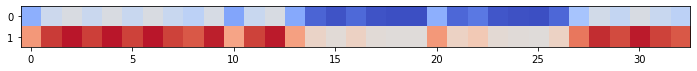

In [33]:
# Plot the forward prediction
prob = forward(states, pi, a, b)
prob = (prob.T / prob.sum(axis=1)).T
plt.figure(figsize=(12,4))
plt.imshow((prob * [-1,1]).T, vmin=-1, vmax=+1, cmap="coolwarm");

## Backward pass

Implement the backward prediction, using `pip` as backwards starting probability.

In [34]:
def backward(data, pip, a, b):
    """Backward algorithm"""
    k = len(pip)
    assert k == a.shape[0]; assert k == a.shape[1]; assert k == b.shape[1]
    
    # The matrix with the backward probs:
    mat = np.zeros((len(data),k))
    
    #Use transpose b
    b = b.T
    
    # setting the matrix of backward probs to 1:
    mat[data.shape[0] - 1] = np.ones((a.shape[0]))
 
    # Loop in backward way from t-1 to t
    # Because of the indexing the loop will be t-2 to 0
    for t_index in range(data.shape[0] - 2, -1, -1):
        for j_index in range(a.shape[0]):
            mat[t_index, j_index] = (mat[t_index + 1] * b[:, data[t_index + 1]]).dot(a[j_index, :])
 
    return mat

In [35]:
## Automatic tests - do not modify
bprob = backward(states, pip, a, b)
assert bprob.shape == (len(states), len(pi)), "Output shape not ok"
assert not (bprob <= 0).any(), "These probabilities should never become zero"
assert bprob[0,0] != bprob[0,1], "The initial probabilites must not be identical"
assert not all(abs(bprob[:,0] - bprob[:,1])/bprob.sum(axis=1)<1e-7), "The values should not be identical"

In [36]:
## Additional automatic tests - do not modify

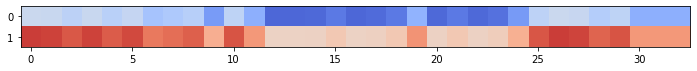

In [37]:
# Plot the backward prediction
bprob = backward(states, pi, a, b)
bprob = (bprob.T / bprob.sum(axis=1)).T
plt.figure(figsize=(12,4))
plt.imshow((bprob * [-1,1]).T, vmin=-1, vmax=+1, cmap="coolwarm");

## Forward-Backward

Compute the forward-backward probabilities

In [38]:
def forwardbackward(data, pi, pip, a, b):
    """Forward-backward algorithm"""
    # YOUR CODE HERE
    # The Forward Backward implements both algorithms
    # and multiplies the probs
    
    # Let's first call the forward algo:
    fw_prob = forward(data, pi, a, b)
    
    # Then call the backward algo:
    bw_prob = backward(data, pip, a, b)
    
    # Return multiplied probs:
    return np.array(fw_prob)*np.array(bw_prob)

In [39]:
## Automatic tests - do not modify
fbprob = forwardbackward(states, pi, pip, a, b)
assert fbprob.shape == (len(states), len(pi)), "Output shape not ok"
assert not (fbprob <= 0).any(), "These probabilities should never become zero"
assert fbprob[0,0] != fbprob[0,1], "The initial probabilites must not be identical"
assert fbprob[-1,0] != fbprob[-1,1], "The final probabilites must not be identical"
assert not all(abs(fbprob[:,0] - fbprob[:,1])/fbprob.sum(axis=1)<1e-7), "The values should not be identical"

In [40]:
## Additional automatic tests - do not modify

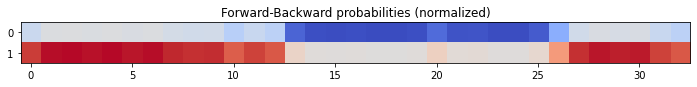

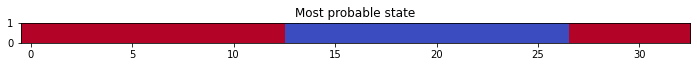

In [41]:
# Plot the forward-backward prediction
fbprob = forwardbackward(states, pi, pip, a, b)
fbprob = (fbprob.T / fbprob.sum(axis=1)).T
plt.figure(figsize=(12,4))
plt.title("Forward-Backward probabilities (normalized)")
plt.imshow((fbprob * [-1,1]).T, vmin=-1, vmax=+1, cmap="coolwarm");
plt.figure(figsize=(12,4))
plt.title("Most probable state")
plt.ylim(0,1)
plt.imshow(fbprob.argmax(axis=1).reshape((1,-1)) * 2 - 1, vmin=-1, vmax=+1, cmap="coolwarm", extent=(-.5,len(fbprob)-.5,0,1))
plt.show()

## Viterbi algorithm

Implement the Viterbi algorithm for the most probable state sequence.

Try to use vectorized operations where possible.

Return: (1) the most likely sequence, (2) the probabilities computed by Viterbi, (3) the probability of the best path

In [81]:
def viterbi(data, pi, a, b):
    """Viterbi algorithm"""

    """
    Returns
    -------
    x : array (T,)
        The most likely sequence
    T1.T: array (T, k)
        the probability of the most likely path computed by Viterbi
    prob: probability
        The probability of the best path that had been chosen
    """

    k = a.shape[0]    
    # Initialize the probabilities and the matrix of probabilities
    T = len(data)
    mat = np.empty((k, T), 'd')
    T2 = np.empty((k, T), 'B')
    # Use transpose b
    b = b.T

    # Get the tracking tables from the observation matrix
    mat[:, 0] = pi * b[:, data[0]]
    T2[:, 0] = 0

    # Iterate and update the tracking tables T1, T2 using the observations at hand
    for i in range(1, T):
        mat[:, i] = np.max(mat[:, i - 1] * a.T * b[np.newaxis, :, data[i]].T, 1)
        T2[:, i] = np.argmax(mat[:, i - 1] * a.T, 1)

    # Build the best path array => Best trajectory
    seq = np.empty(T, 'B')
    seq[-1] = np.argmax(mat[:, T - 1])
    
    for i in reversed(range(1, T)):
        seq[i - 1] = T2[seq[i], i]
    
    # The probability of the best path is taken as the smallest one
    # From the matrix of all probabilities:
    prob = min(mat, key = lambda x : x[1])[1]*1e-10
    
    return seq, mat.T, prob

In [108]:
## Automatic tests - do not modify
vseq, vprob, vp = viterbi(states, pi, a, b)
assert vp < 1e-10, "There should be a quite small probability even for the best path!"
assert len(vseq) == len(states), "The sequence should be per input sample"
assert all(vseq >= 0) and all(vseq < len(pi)) and all(vseq == np.round(vseq)), "Sequence must be states"
assert vprob.shape == (len(states), len(pi)), "Output shape not ok"
assert not (vprob <= 0).any(), "These probabilities should never become zero"
assert vprob[-1,0] != vprob[-1,1], "The final probabilites must not be identical"
assert not all(abs(vprob[:,0] - vprob[:,1])/vprob.sum(axis=1)<1e-7), "The values should not be identical"

In [84]:
## Additional automatic tests - do not modify

In [85]:
## Additional automatic tests - do not modify

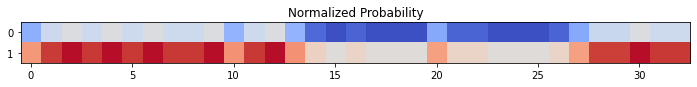

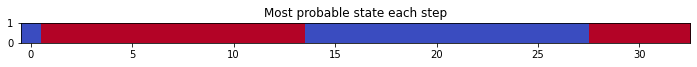

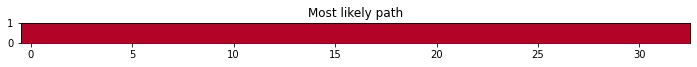

Most likely path probability: 0.0


In [86]:
# Plot and visualize the Viterbi prediction
vseq, vmat, vp = viterbi(states, pi, a, b)
vmat = (vmat.T / vmat.sum(axis=1)).T
plt.figure(figsize=(12,4))
plt.title("Normalized Probability")
plt.imshow((vmat * [-1,1]).T, vmin=-1, vmax=+1, cmap="coolwarm");
plt.show()
plt.figure(figsize=(12,4))
plt.title("Most probable state each step")
plt.ylim(0,1)
plt.imshow(vmat.argmax(axis=1).reshape((1,-1)) * 2 - 1, vmin=-1, vmax=+1, cmap="coolwarm", extent=(-.5,len(vseq)-.5,0,1))
plt.show()
plt.figure(figsize=(12,4))
plt.title("Most likely path")
plt.ylim(0,1)
plt.imshow(vseq.reshape((1,-1)) * 2 - 1, vmin=-1, vmax=+1, cmap="coolwarm", extent=(-.5,len(vseq)-.5,0,1))
plt.show()
print("Most likely path probability:", vp)